In [1]:
from IPython.display import Image

#### 시간 단위의 집계 
 
 - timestamp, datetime ....

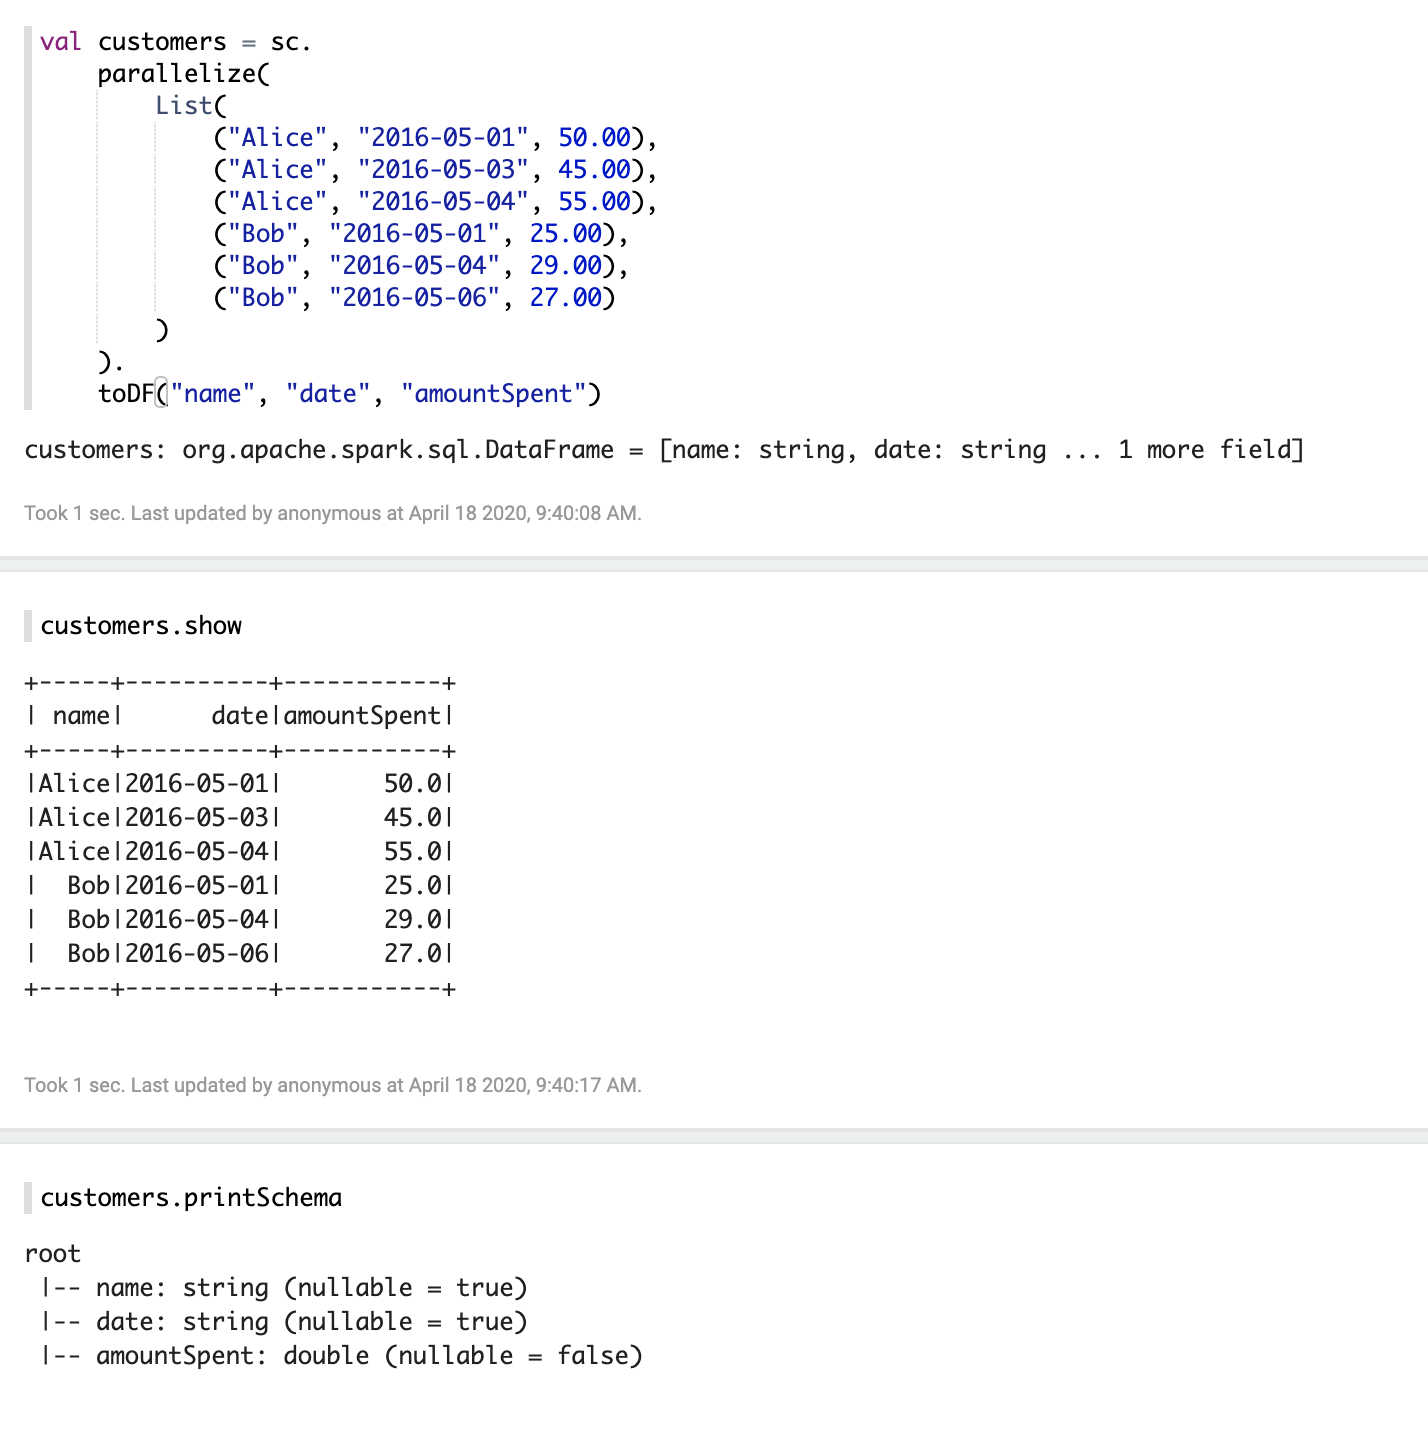

In [3]:
Image('./capture/02_window.png')

### 윈도우 연산 사용

- customers 에서 date의 type : string --> unix_timestamp / timestamp

-----
- unix_timestamp : 초 단위 timestamp

-----
    val customers2 = customers
        .withColumn("unix_timestamp", unix_timestamp('date, "yyyy-MM-dd"))
        .withColumn("timestamp", 'unix_timestamp.cast("timestamp"))

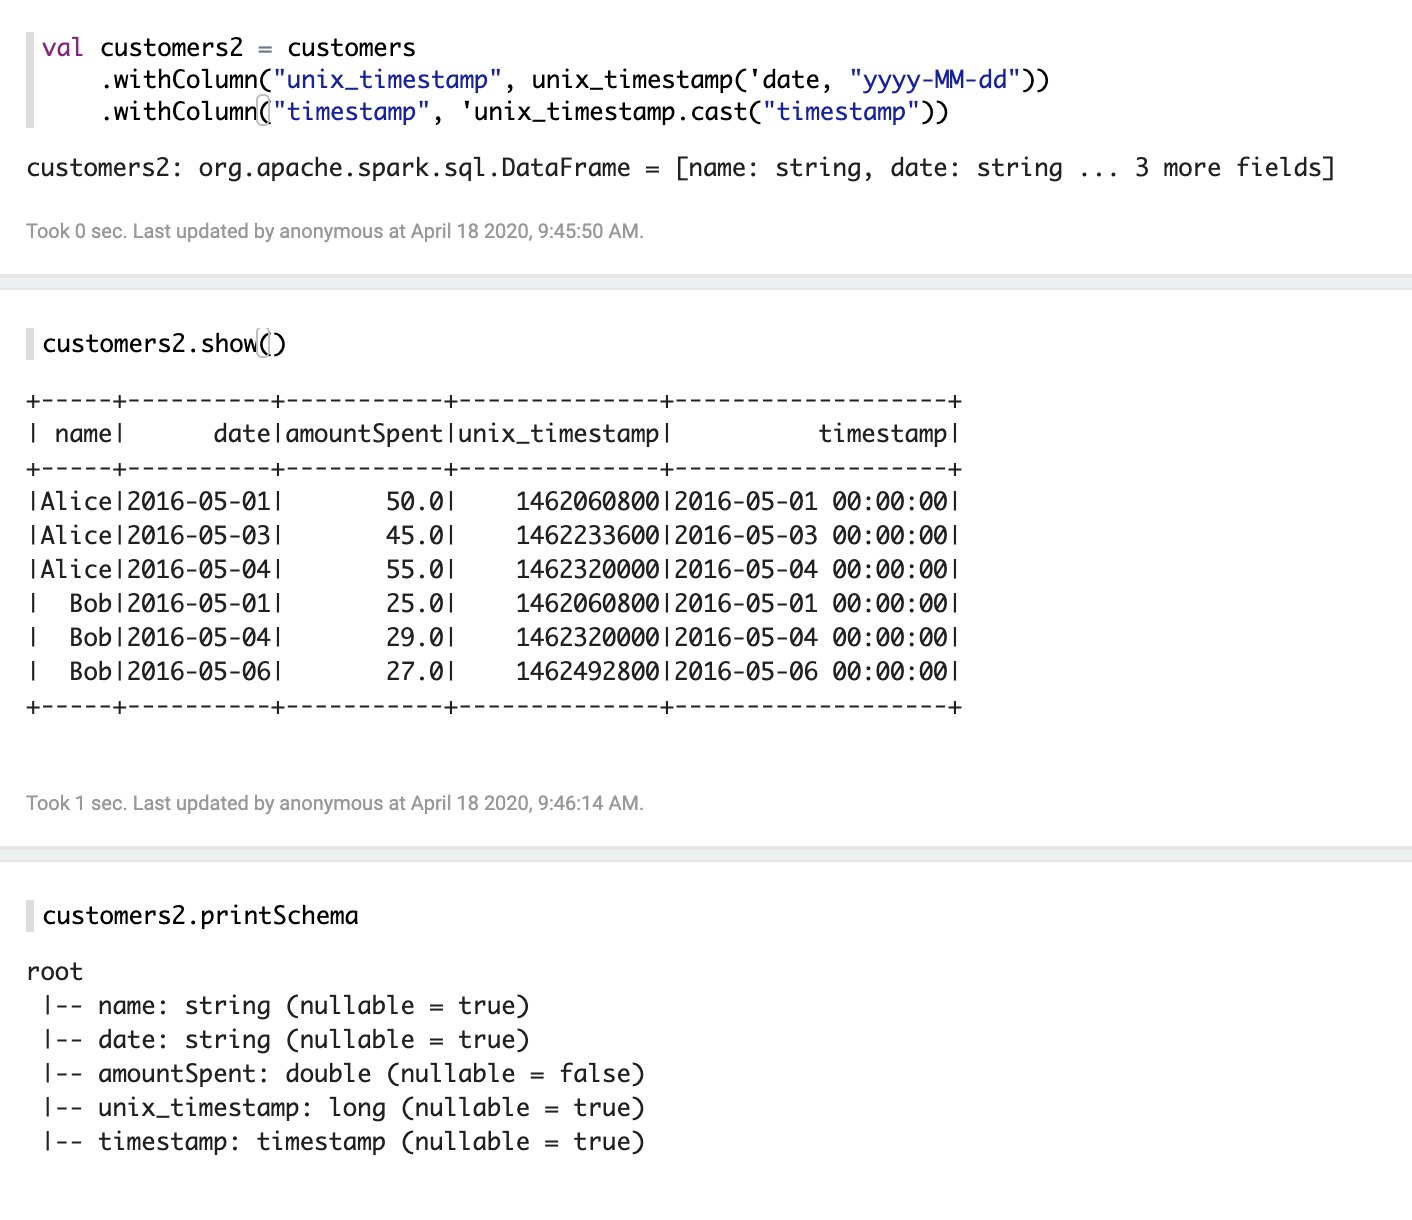

In [4]:
Image('./capture/03_window.png')

-----

    customers2.
        groupBy($"name", window($"timestamp", "2 days")).
        agg(mean("amountSpent"), sum("amountSpent")).
        orderBy('name, 'window).
        show(false) 
        
- 이름이 같은 것 중에 window를 이틀씩 groupBy
- window 함수에 의한 groupBy는 column명이 window
- UTC 기준시로 출력 : 한국 서버 사용시 +9h

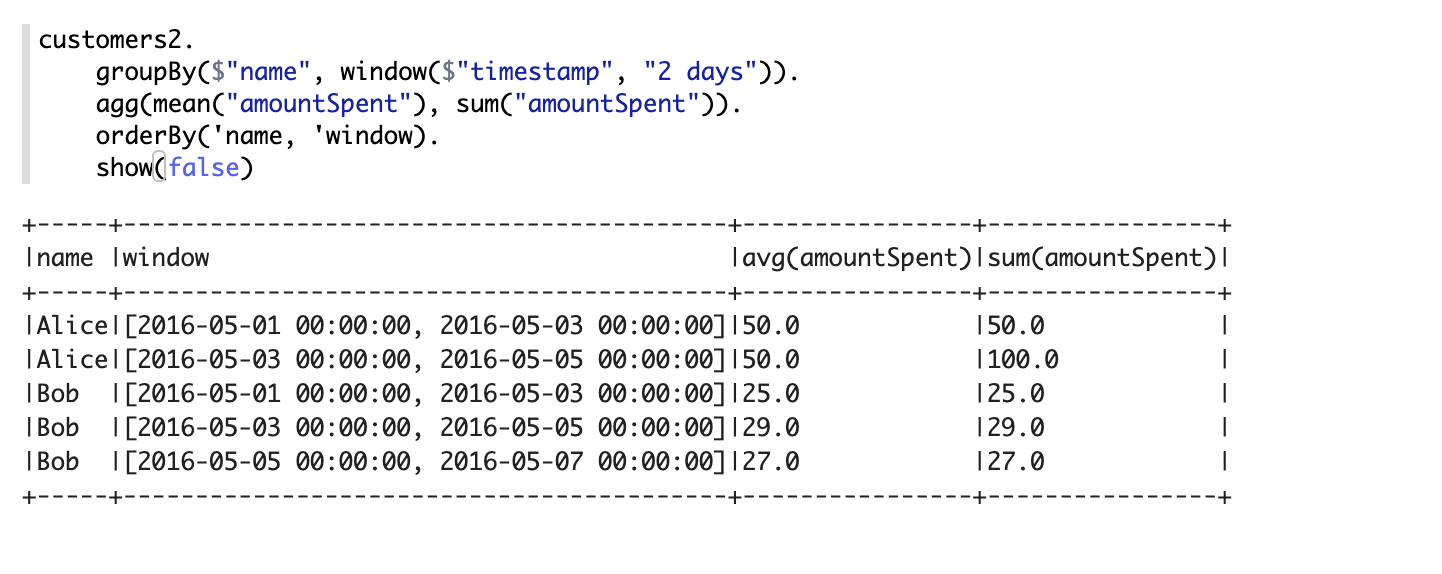

In [5]:
Image('./capture/04_window.png')

- Duration == sliding 
    - 데이터를 겹치게 할 수 있음. 
    - window($"timestamp", "2 days", "1 day")) : 매일 집계하는데, 이틀씩 
    
- groupBy의 기준 : Name, window
- start / end 의 범위를 기준

-----

    customers2.
        groupBy($"name", window($"timestamp", "2 days", "1 day")).
        agg(avg("amountSpent").as("avg_amountSpent"), sum("amountSpent").as("sum_amountSpent")).
        orderBy('name, 'window).
        withColumn("start", $"window.start").
        withColumn("end", $"window.end").
        show(false)

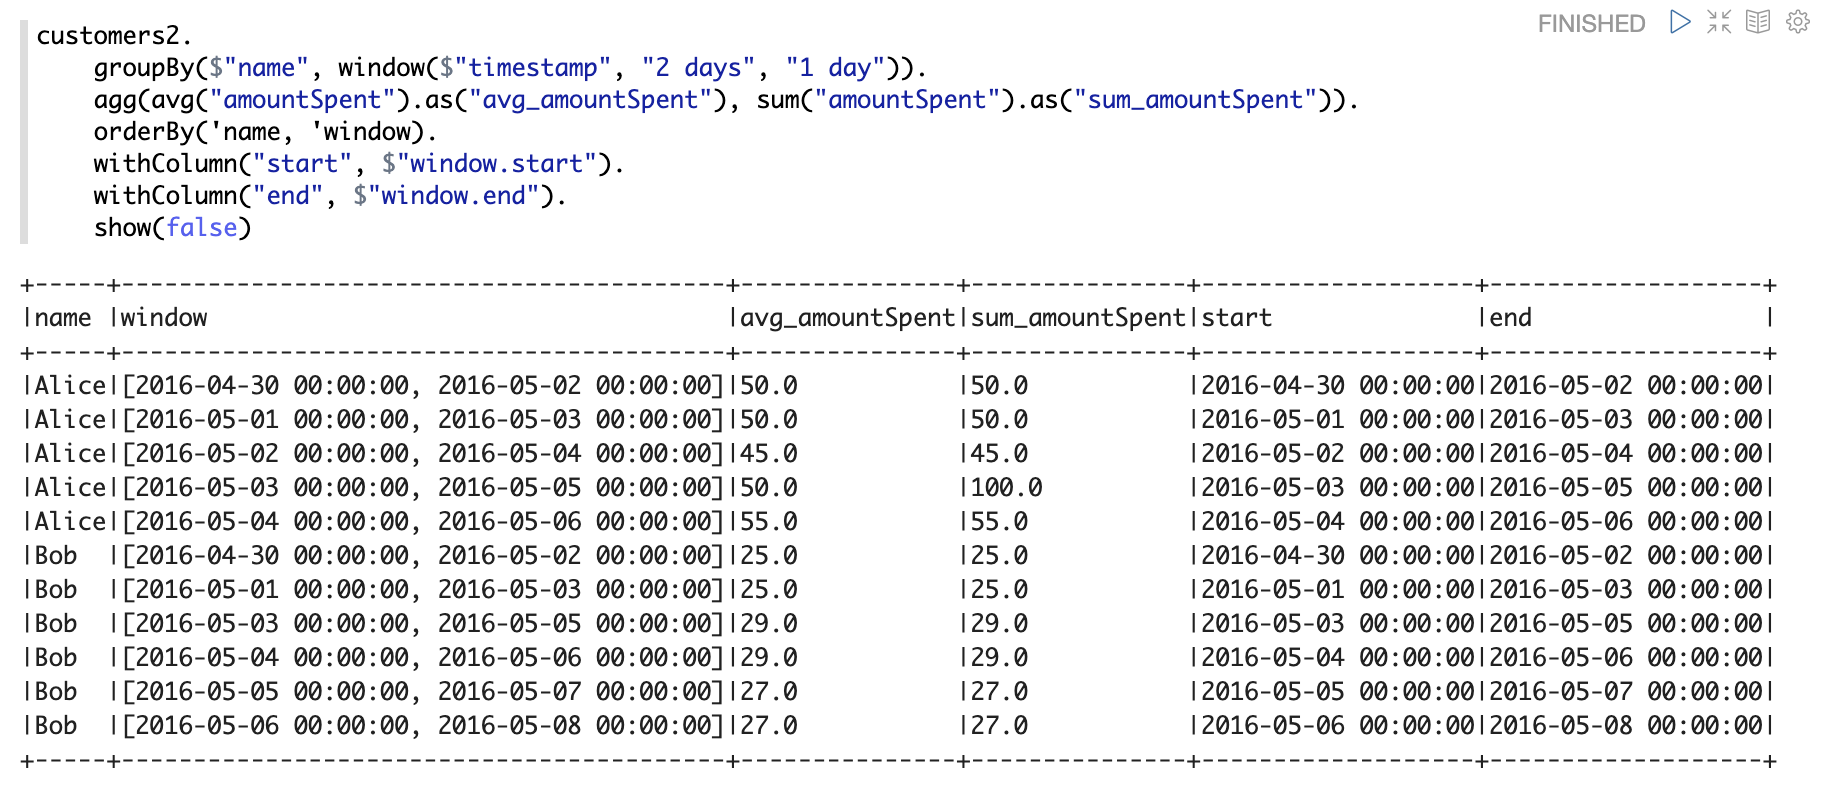

In [6]:
Image('./capture/05_window.png')

-----
- window($"timestamp", "2 days", "1 day", "-9 hours 0 seconds") : start 시간을 조정할 수 있음. 

    customers2.
        groupBy($"name", window($"timestamp", "2 days", "1 day", "-9 hours 0 seconds")).
        agg(mean("amountSpent"), sum("amountSpent")).
        orderBy('name, 'window).
        show(false)

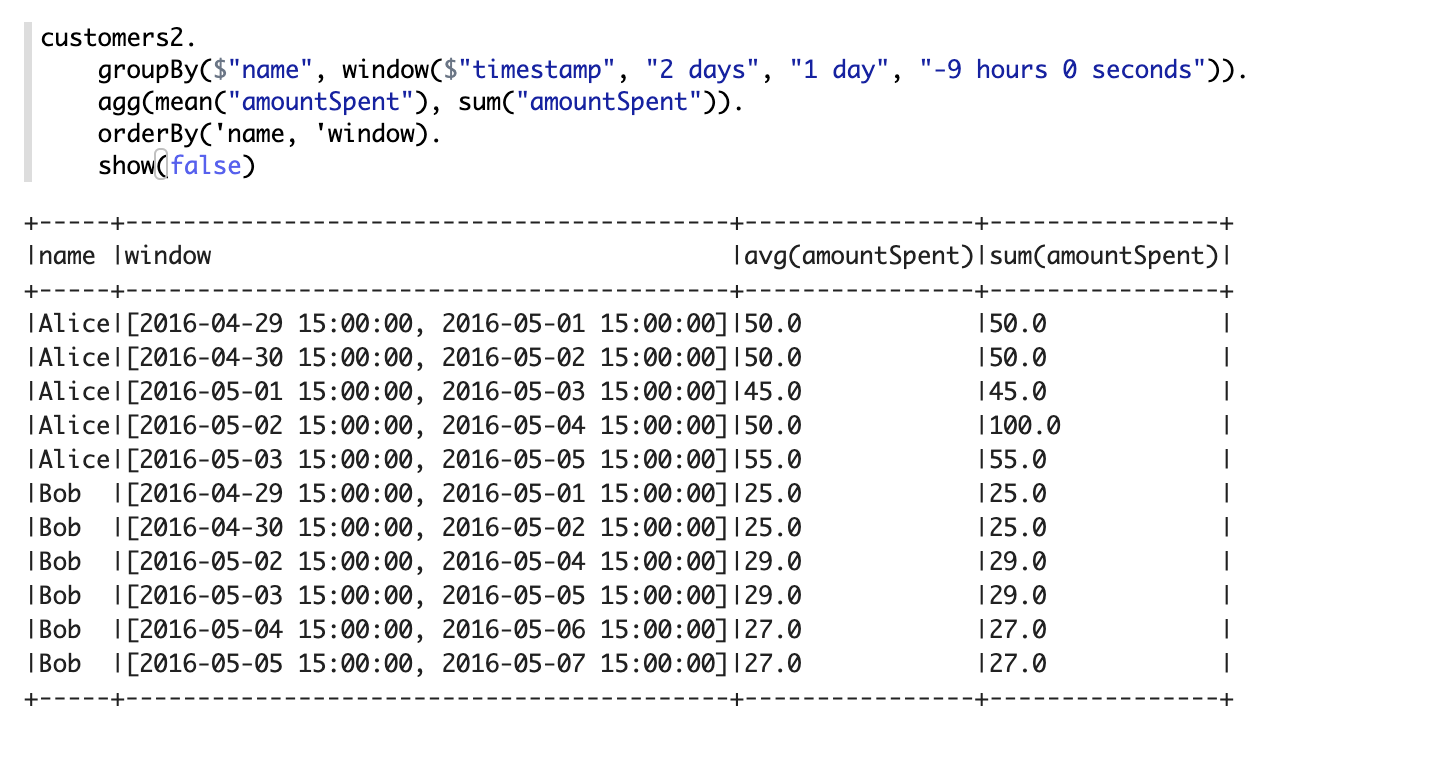

In [7]:
Image('./capture/06_window.png')

----------
### MySQL

 - sudo mysql -uroot -proot

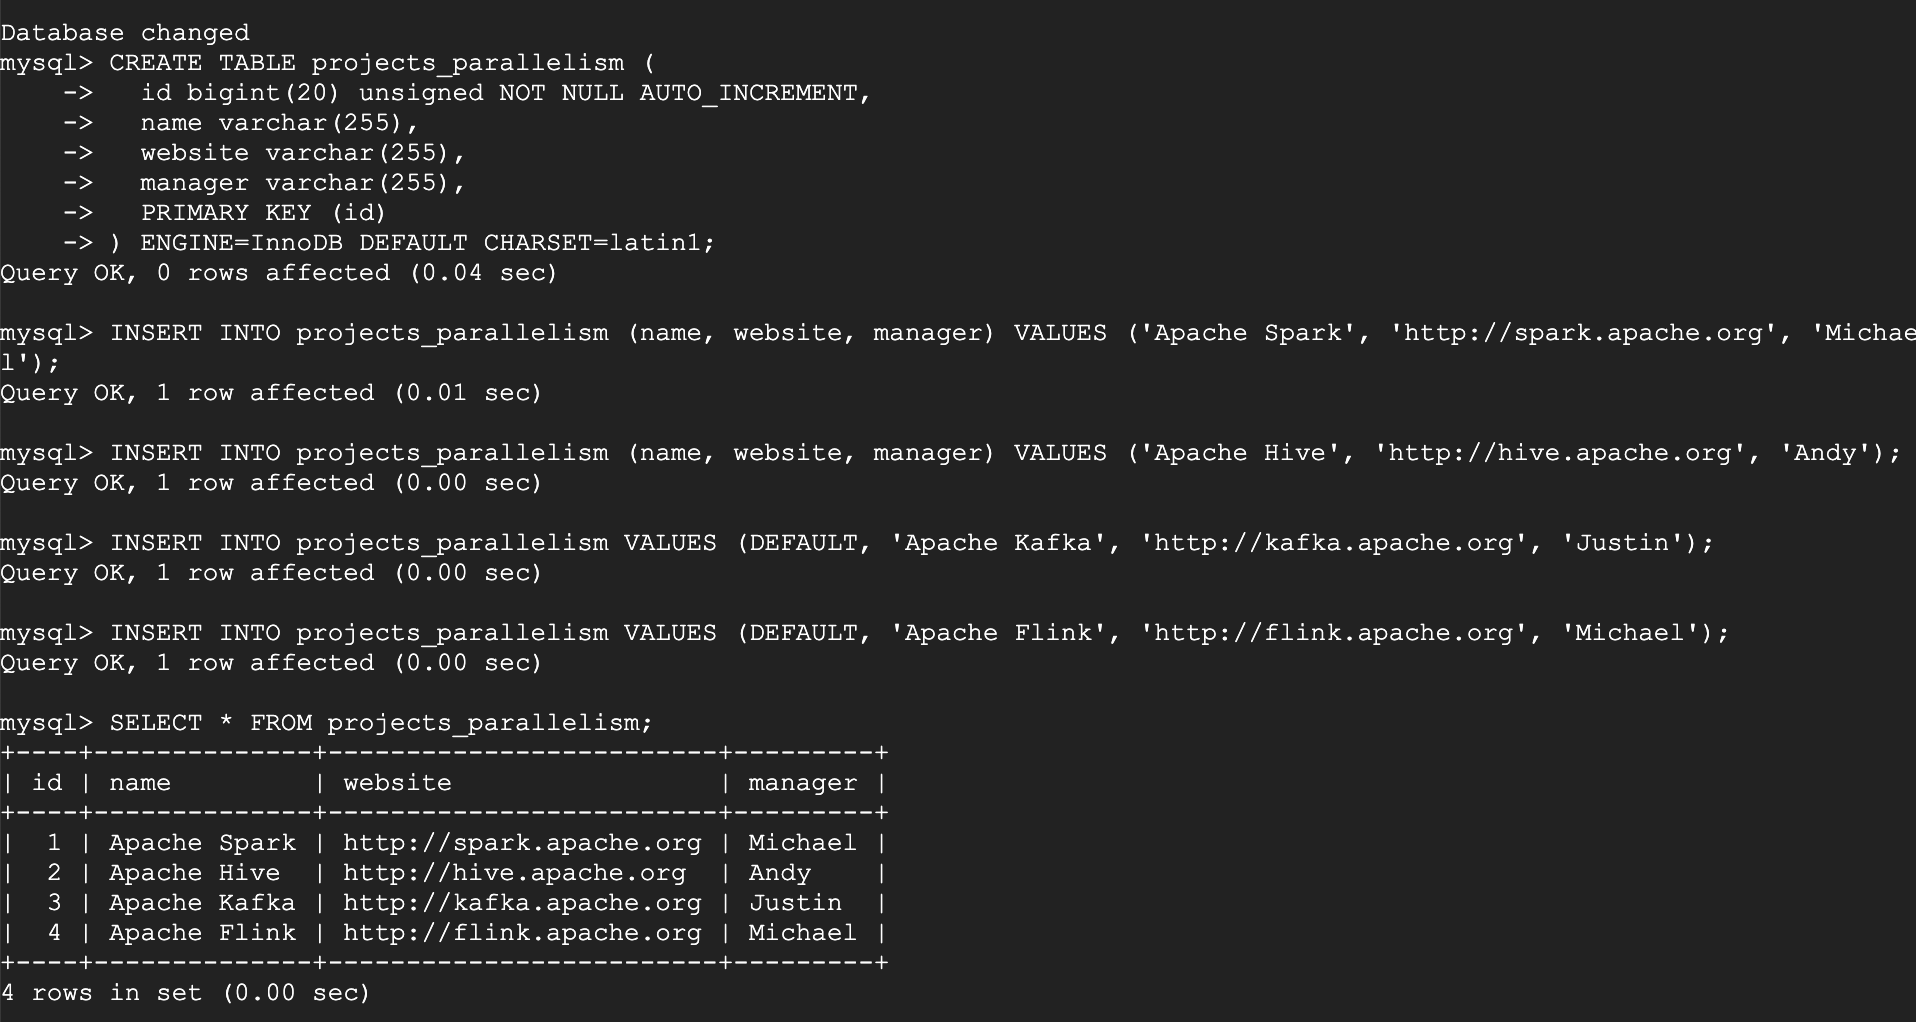

In [2]:
Image('./capture/sql-01.png')

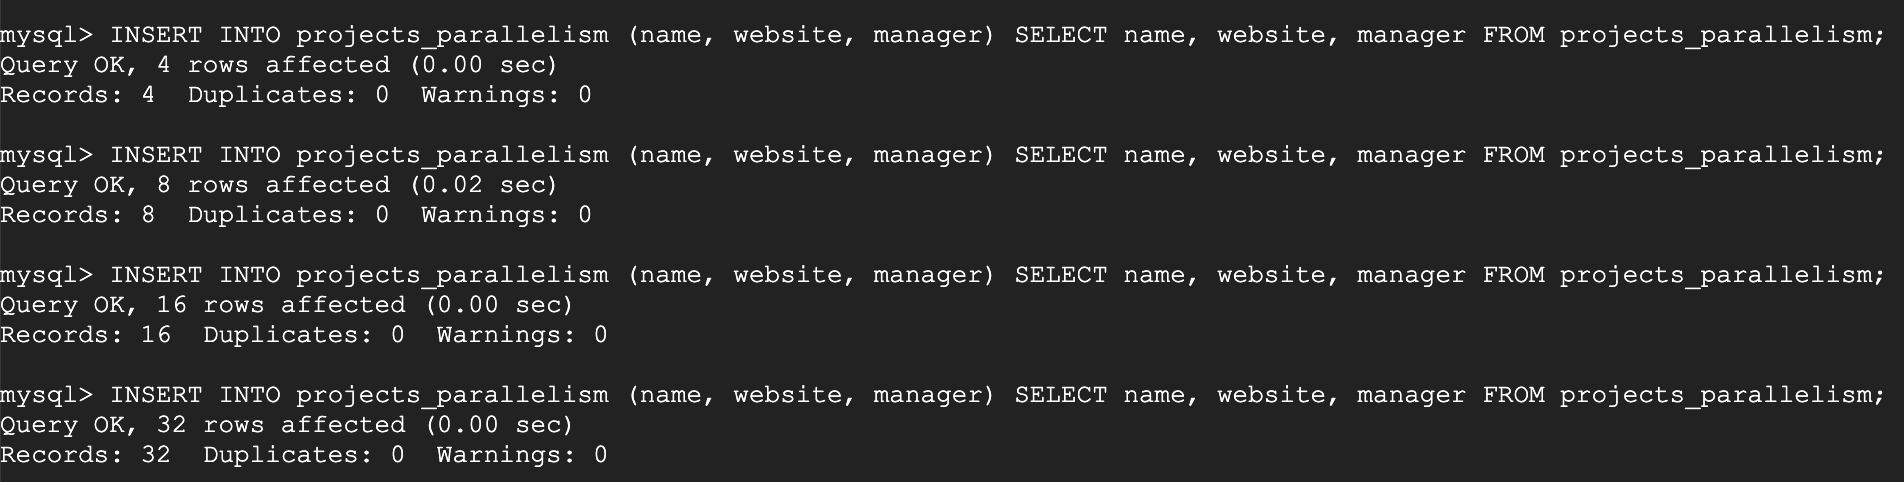

In [3]:
Image('./capture/sql-02.png')

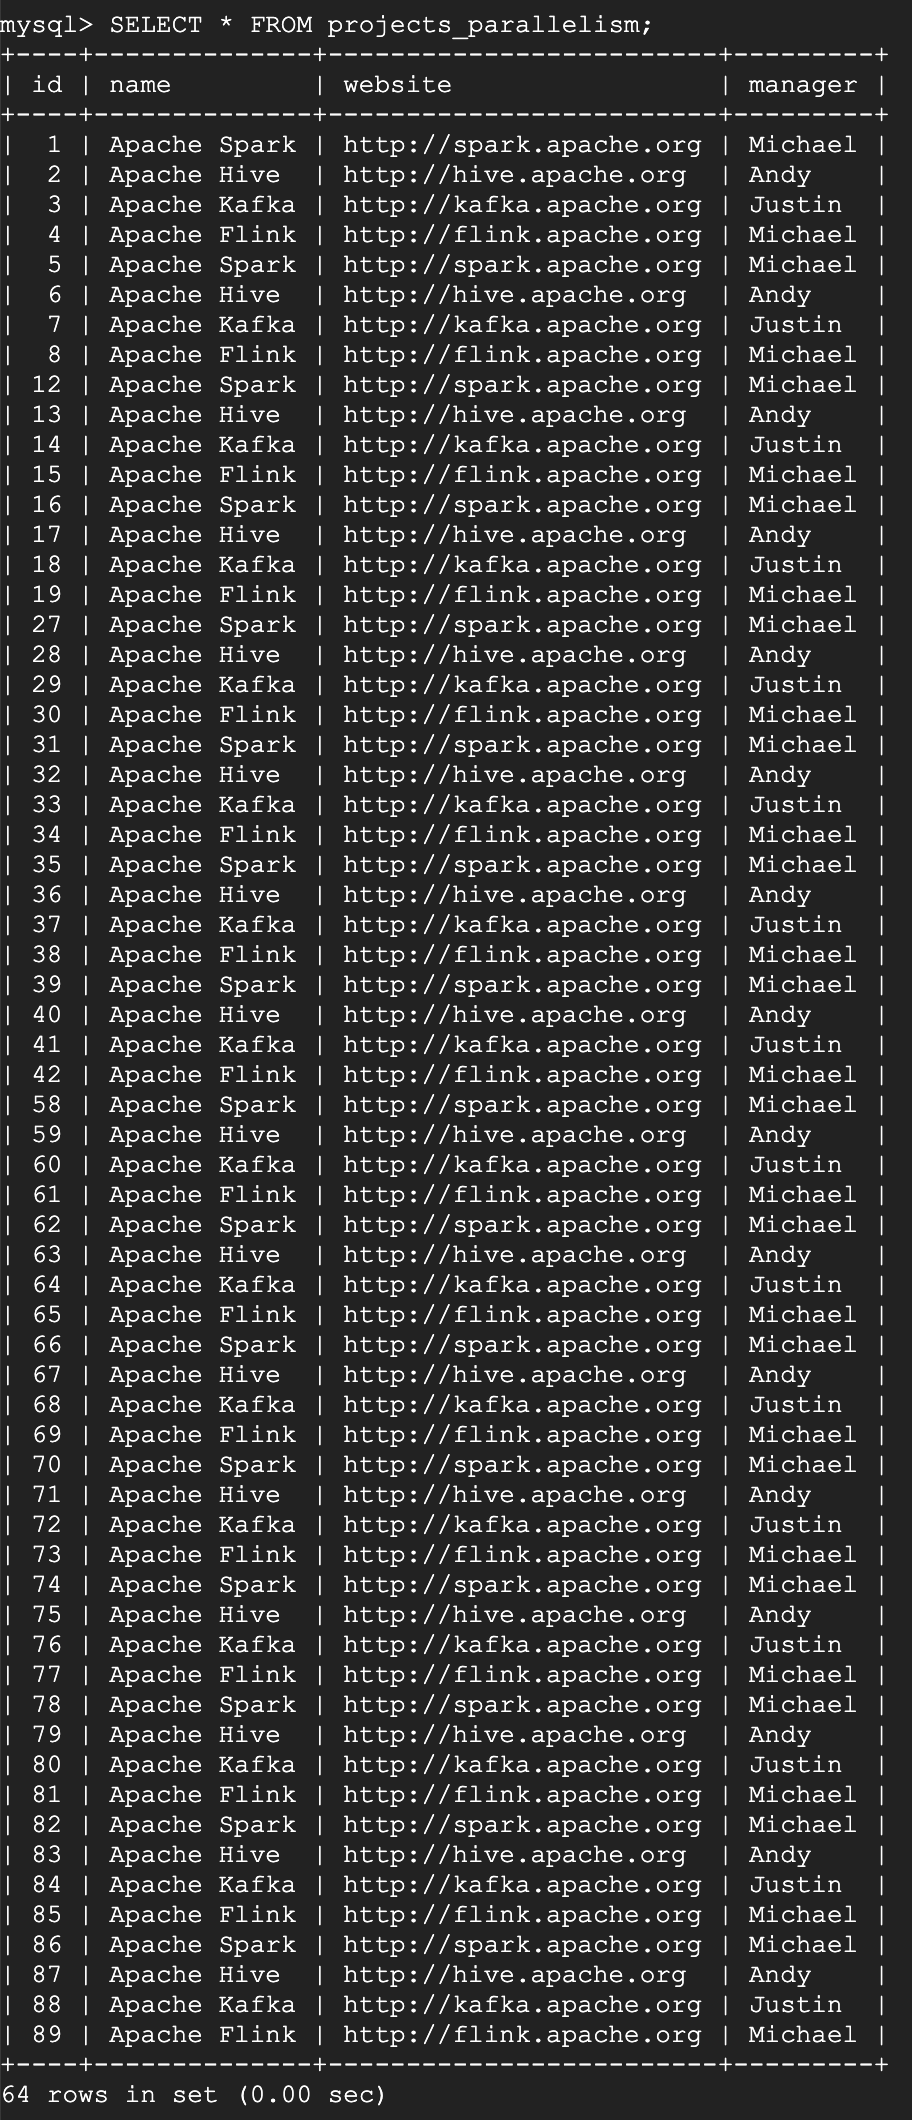

In [4]:
Image('./capture/sql-03.png')

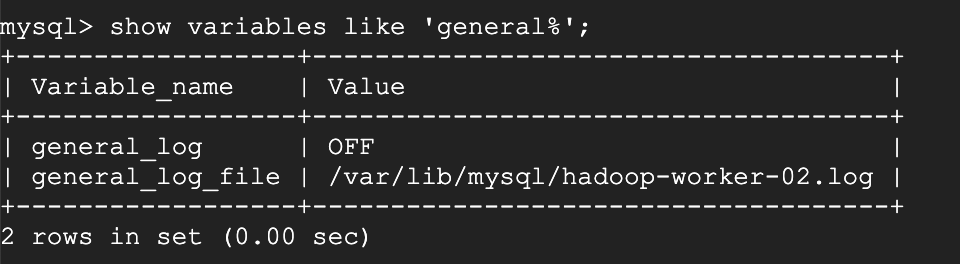

In [5]:
Image('./capture/sql-04.png')

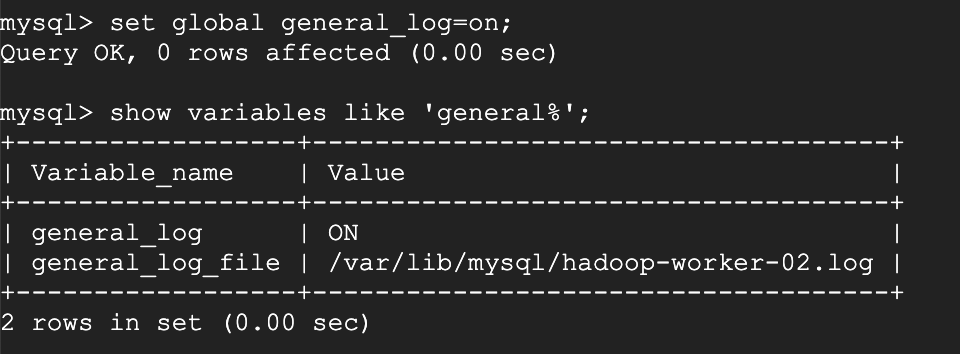

In [6]:
Image('./capture/sql-05.png')